# Разведочный анализ данных (exploratory data analysis, EDA)

In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

## 1. Учимся строить графики

загрузим данные и изучим базовую информацию при помощи pandas.

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
    sep=";",
)

In [ ]:
print(f"Data size: {df.shape}")
df.head()

Data size: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().mean()  # df.isnull() — то же самое, что df.isna()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Теперь давайте посмотрим на данные глазами. По диагонали — маргинальное распределение каждой числовой переменной с учётом целевой переменной. В остальных ячейках — scatter plot каждой пары числовых переменных с учётом целевой переменной.

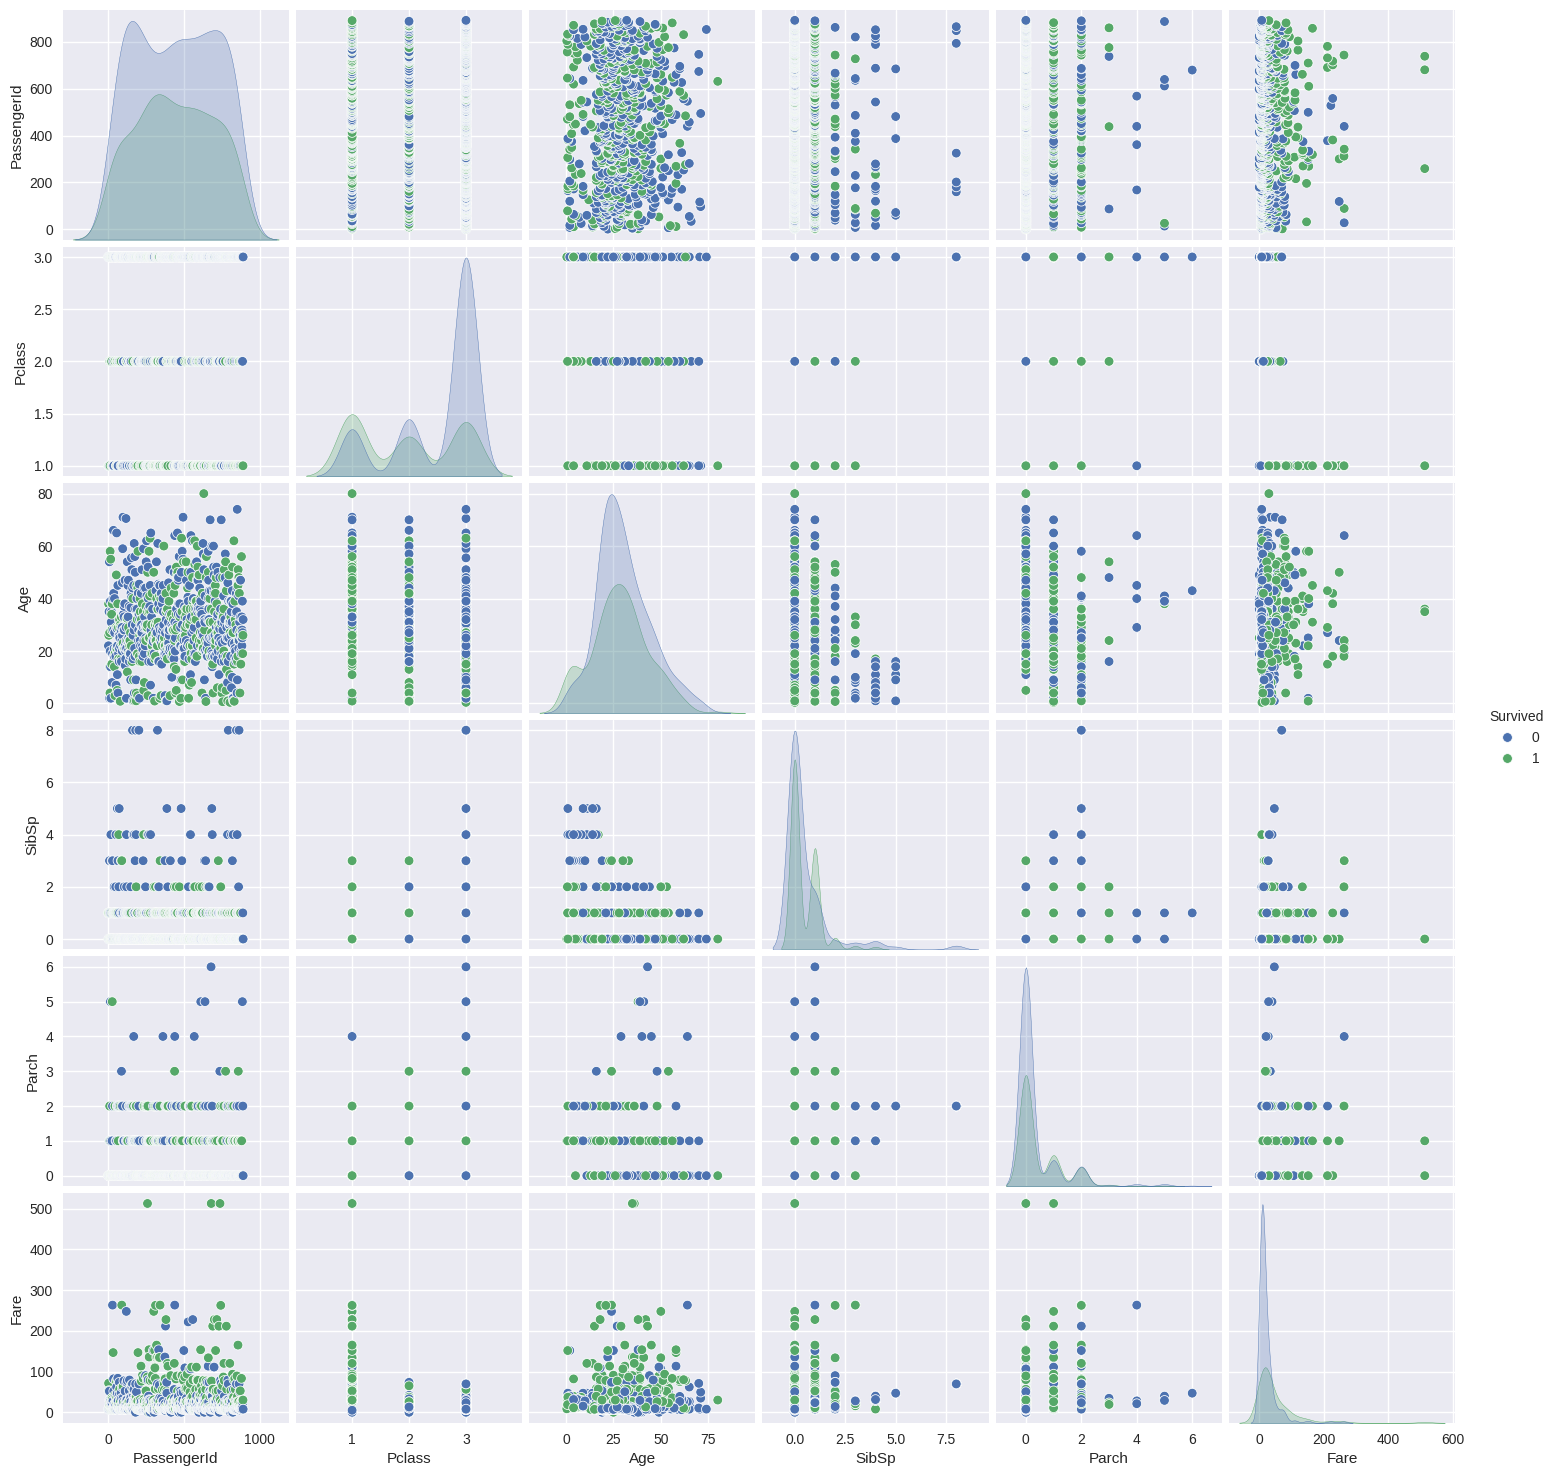

In [ ]:
sns.pairplot(df, hue="Survived");

Начинаем работу с графиками matplotlib и pandas (вызывает те же функции matplotlib).

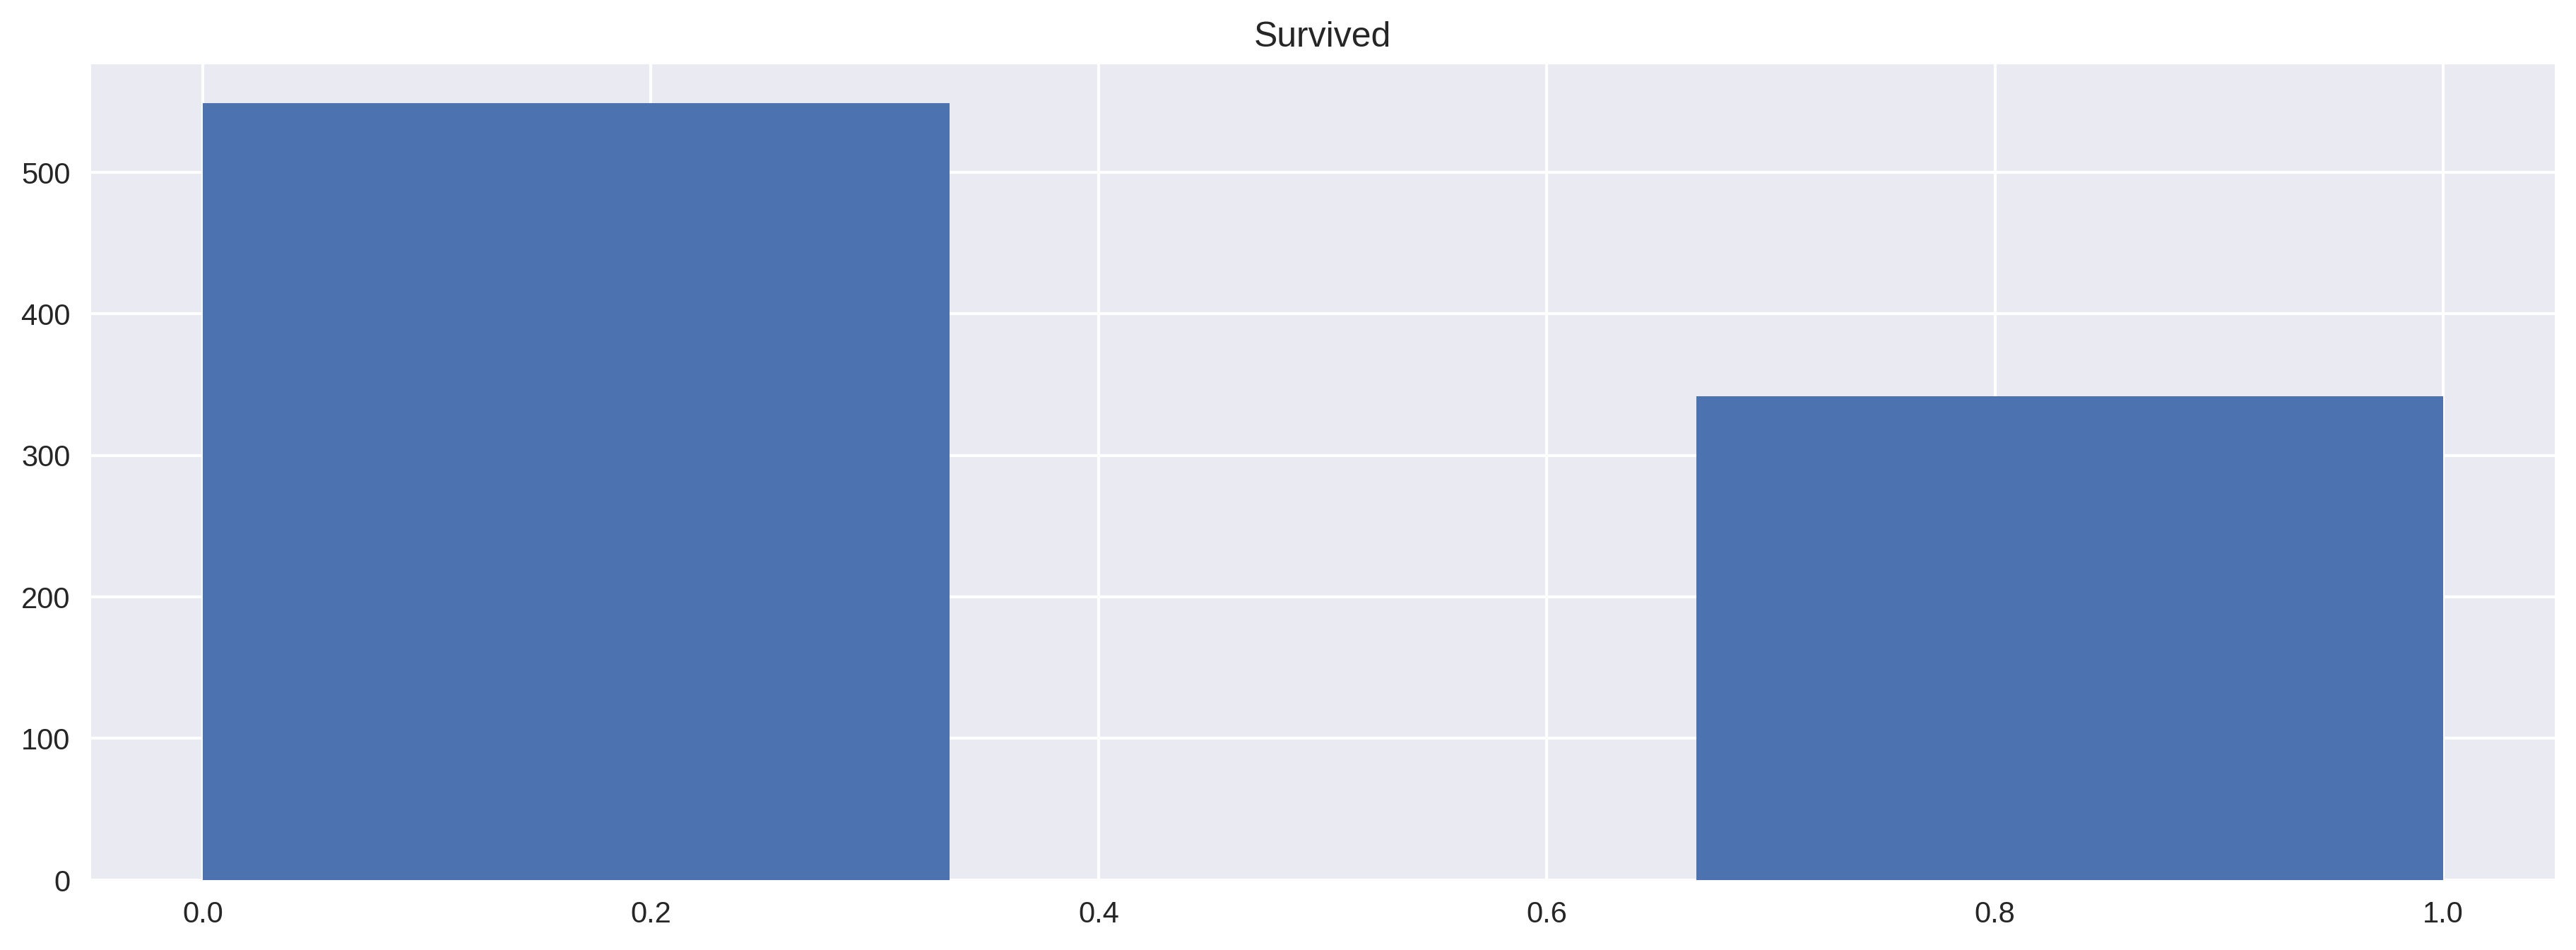

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
plt.title("Survived")
df["Survived"].hist(bins=3);

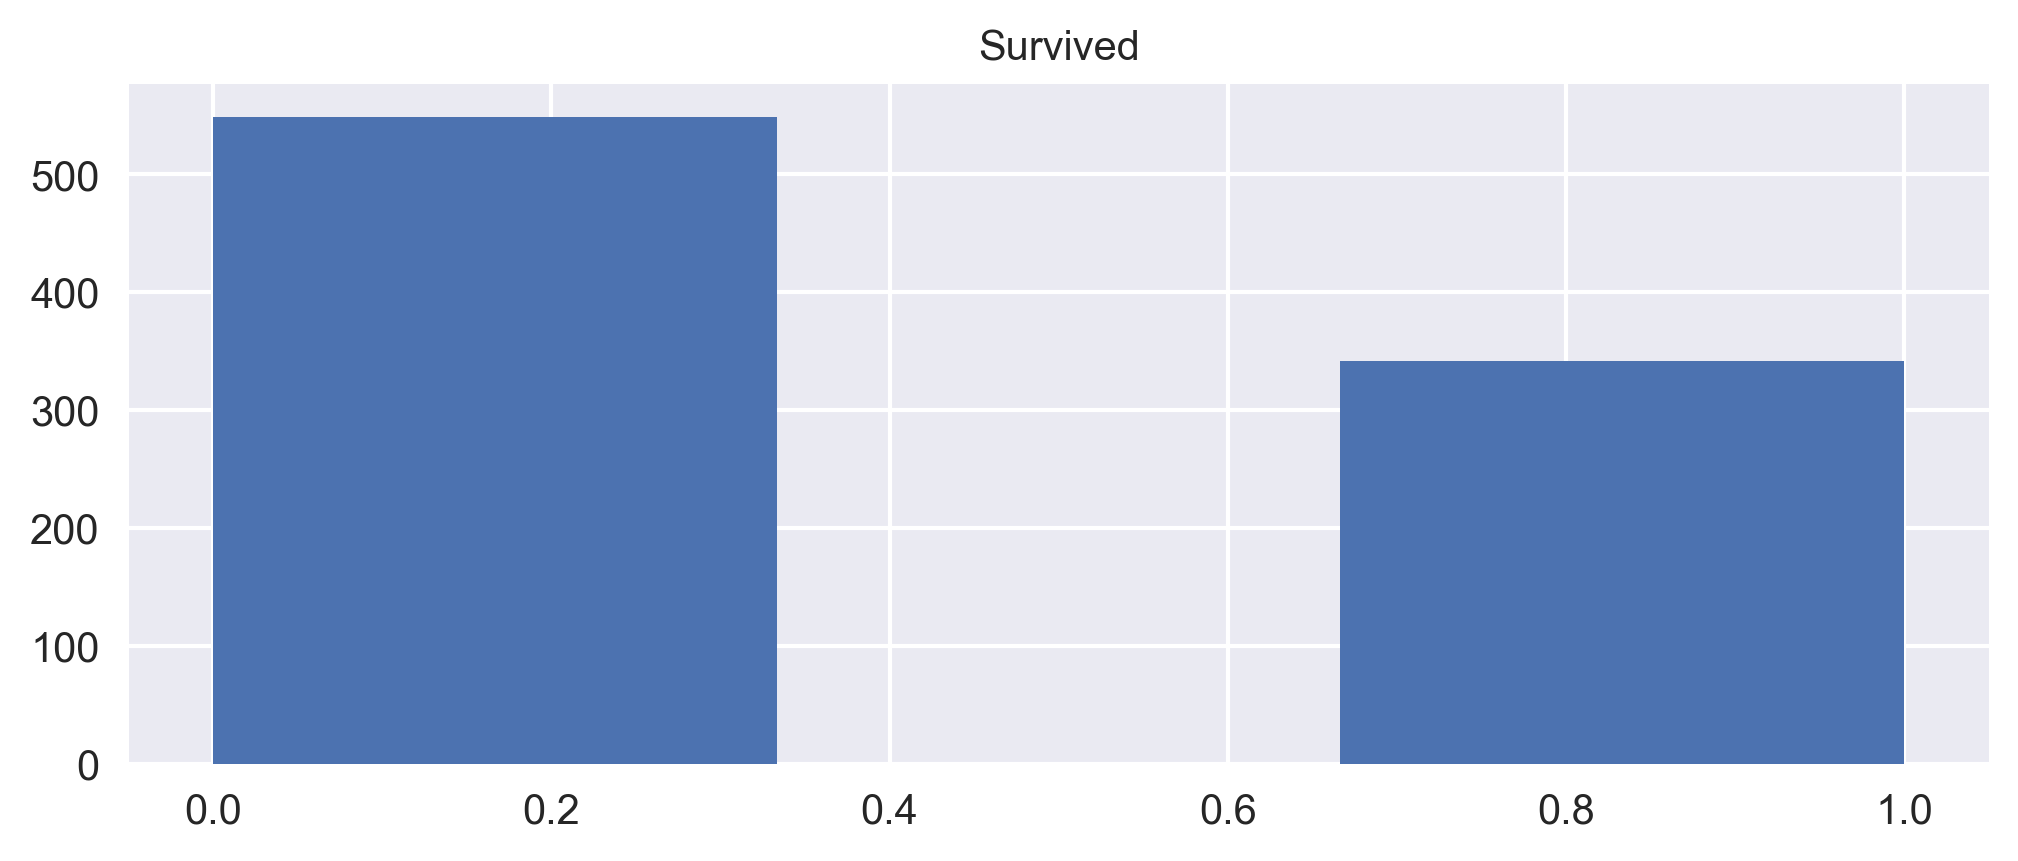

In [ ]:
# То же самое, но только с matplotlib
plt.figure(figsize=(8, 3), dpi=300)
plt.title("Survived", fontsize=10)
plt.hist(df["Survived"], bins=3);

Построим гистаграмму по возрасту. Обратите внимание, что размер фигуры (и многие другие параметры, например, размер шрифтов) можно задавать один раз на весь нутбук при помощи `plt.rc.Params`.

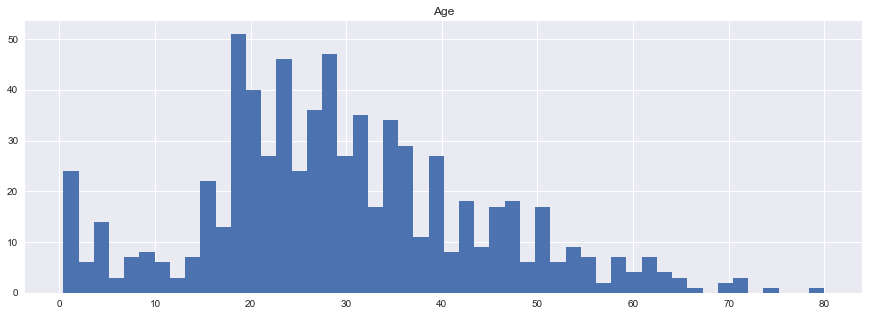

In [ ]:
# plt.figure(figsize=(15, 5), dpi=300)
plt.rcParams["figure.figsize"] = (15, 5)
plt.title("Age")
df["Age"].hist(bins=50);

Для лёгкого разделения по группам выживших и не выживших, используем seaborn.

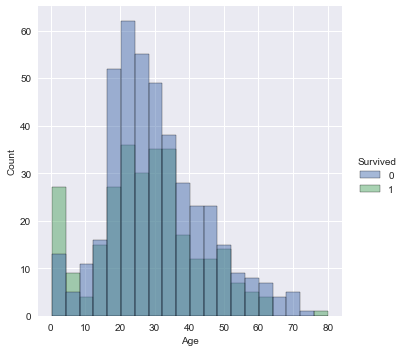

In [ ]:
sns.displot(df, x="Age", hue="Survived")
plt.show()

В matplotlib будет дольше и менее красиво :(

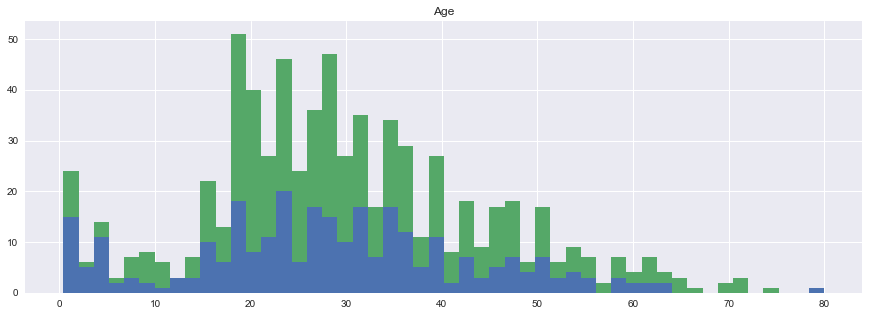

In [ ]:
plt.title("Age")
plt.hist(
    [df["Age"][df["Survived"] == 1], df["Age"][df["Survived"] == 0]],
    stacked=True,
    bins=50,
);

Давайте оценим корреляцию между столбцами числовых признаков.

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Сделаем её чуть более читаемой.

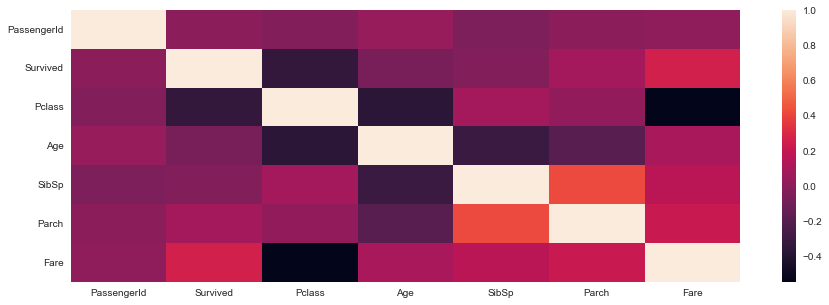

In [ ]:
sns.heatmap(df.corr());

И ещё более читаемой!

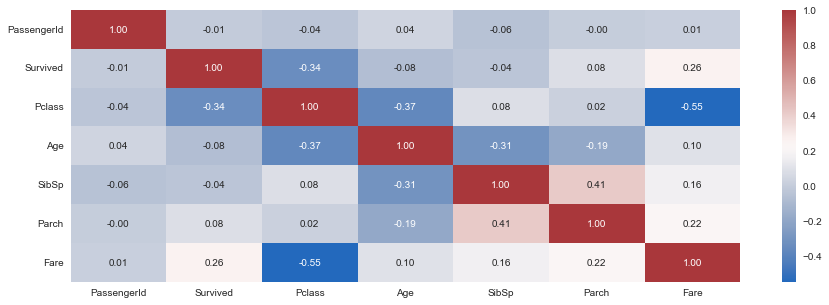

In [ ]:
sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f");

Неповторимый идеал.

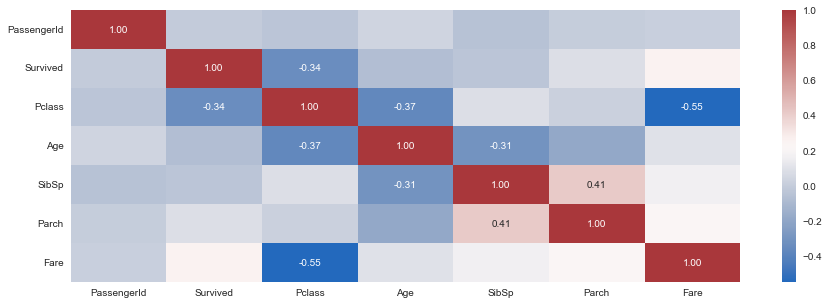

In [ ]:
ax = sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Построим распредление количества билетов разных классов при помощи bar plot.

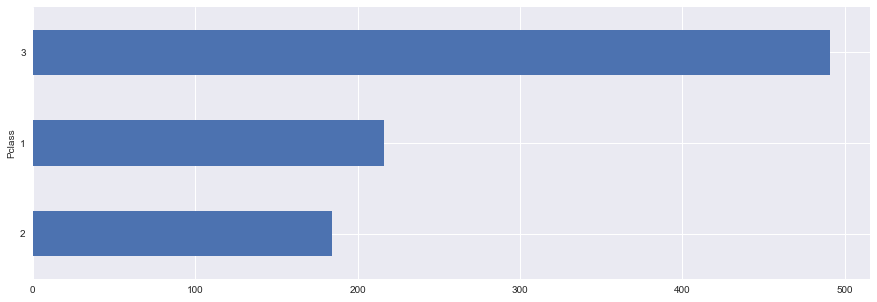

In [ ]:
df.groupby("Pclass")["Name"].nunique().sort_values().plot(kind="barh");

Посмотрим на взаимосвязь разных переменных при помощи scatter plot.

Как scatter строить НЕ нужно:

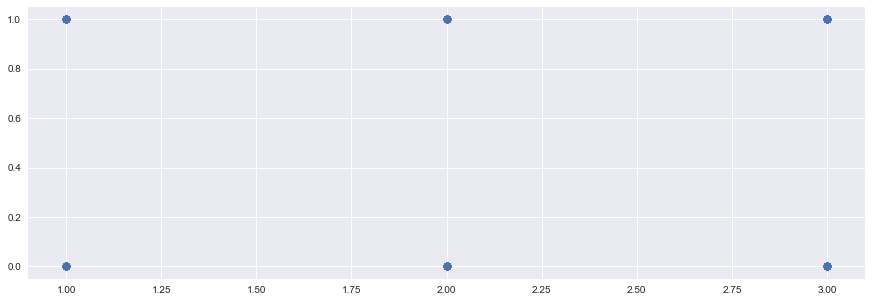

In [ ]:
plt.scatter(df["Pclass"], df["Survived"]);

Как scatter строить нужно:

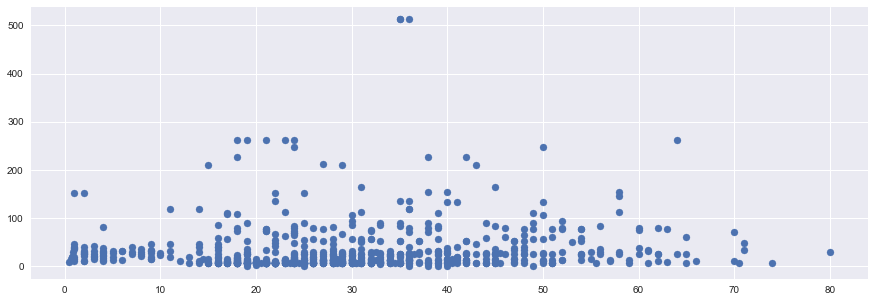

In [ ]:
plt.scatter(df["Age"], df["Fare"]);

Ещё на график можно что-то дорисовать. Например, дополнительные оси.

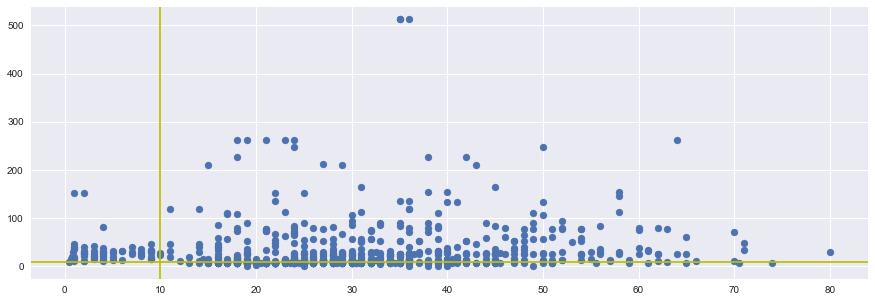

In [ ]:
plt.scatter(df["Age"], df["Fare"])
plt.axhline(10, c="y")
plt.axvline(10, c="y");

Вишенка на торте: рисуем несколько графиков на одной фигуре.

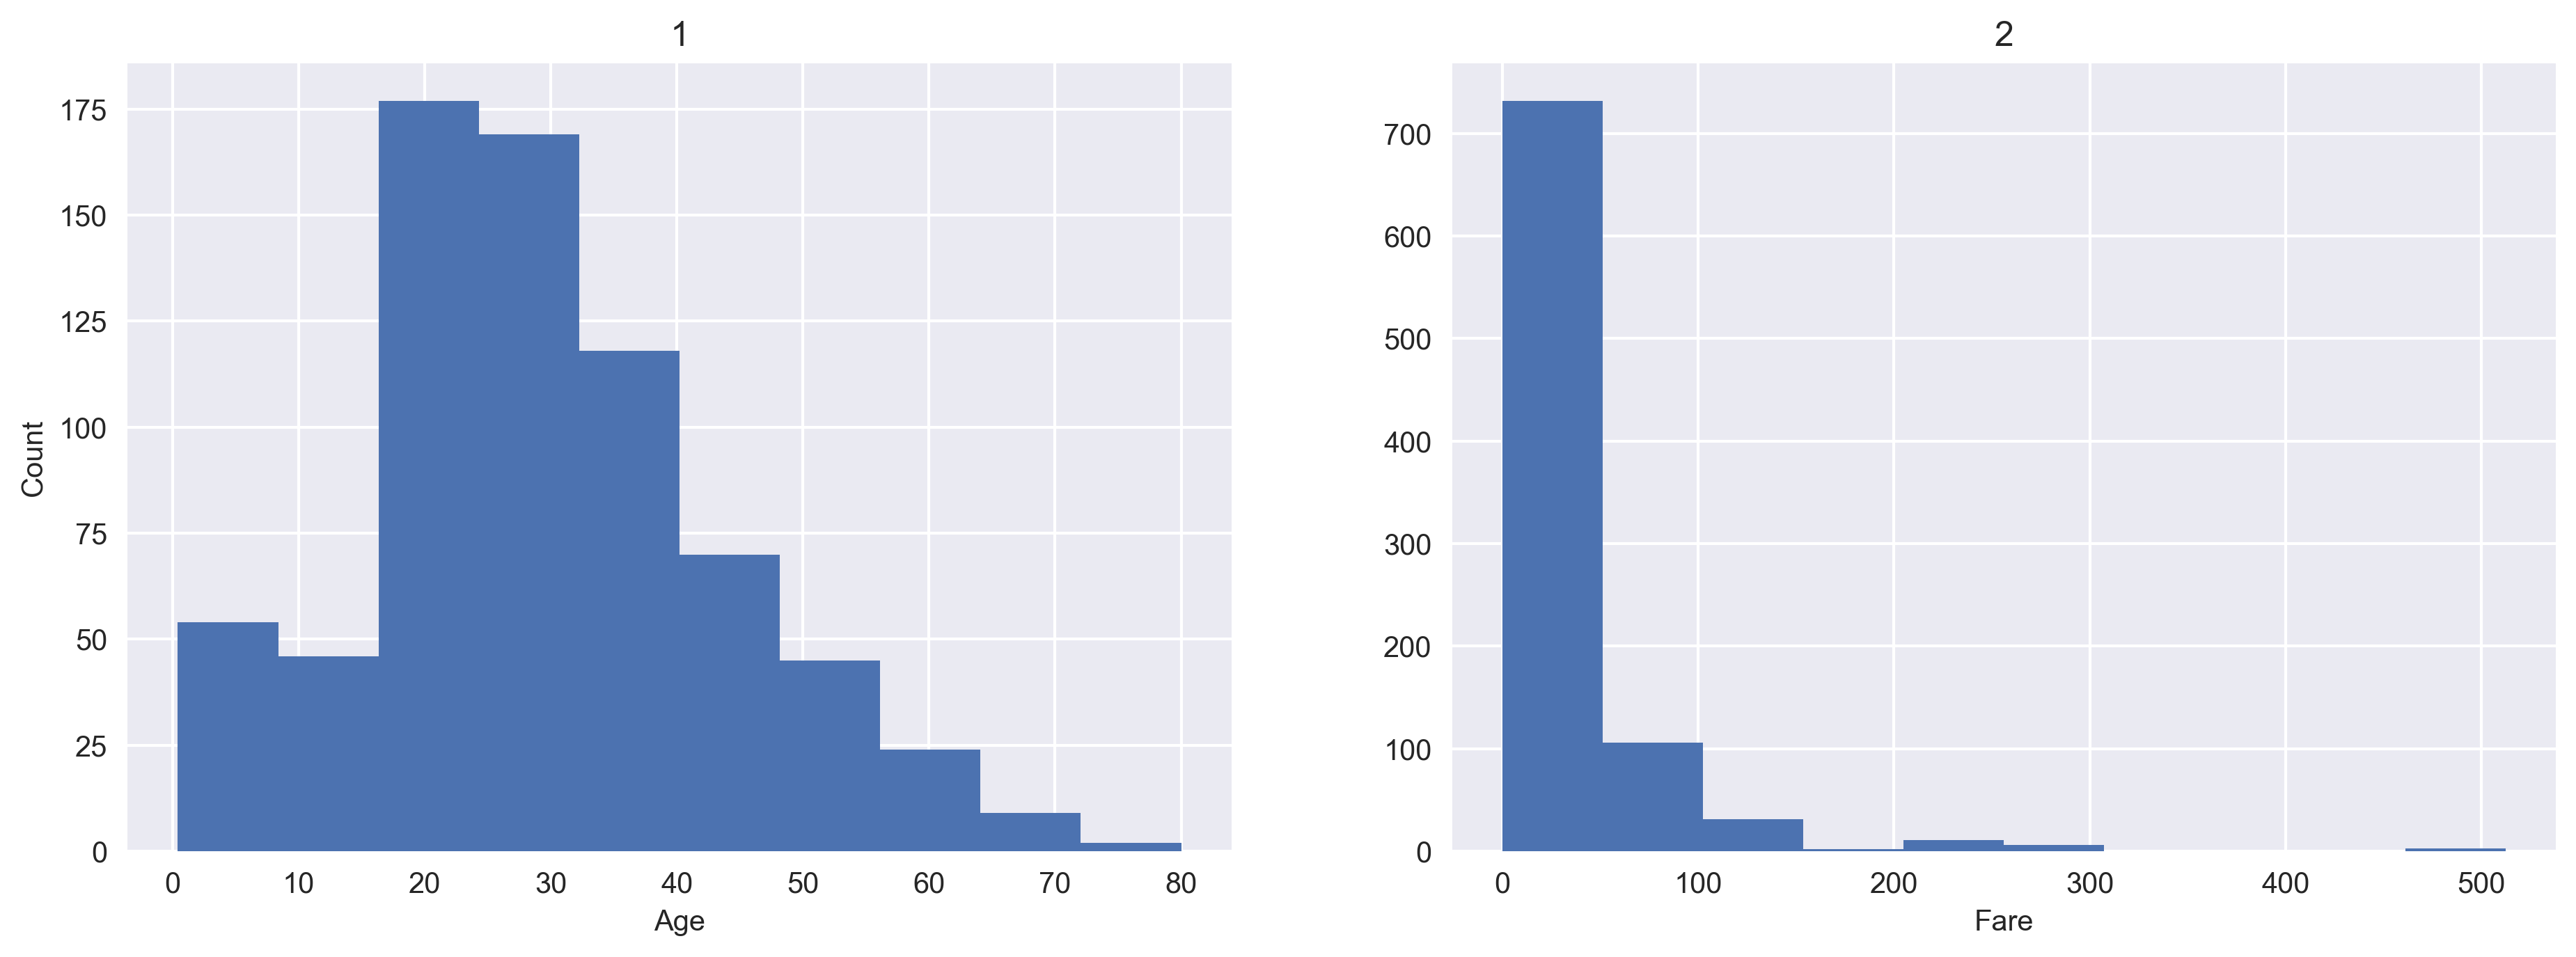

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title("1")
plt.hist(df["Age"])
plt.ylabel("Count")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
plt.title("2")
plt.hist(df["Fare"])
plt.xlabel("Fare")

plt.show()

В способе выше мы должны каждый раз переключаться между тем, где мы рисуем, при помощи `plt.subplot(n_rows, n_cols, idx)`. Часто это не очень удобно, поэтому давайте посмотрим на другой способ взаимодействия с подграфиками. Этот способ позволит, например, удобно итерироваться в цикле по графикам и отрисовывать что-то.

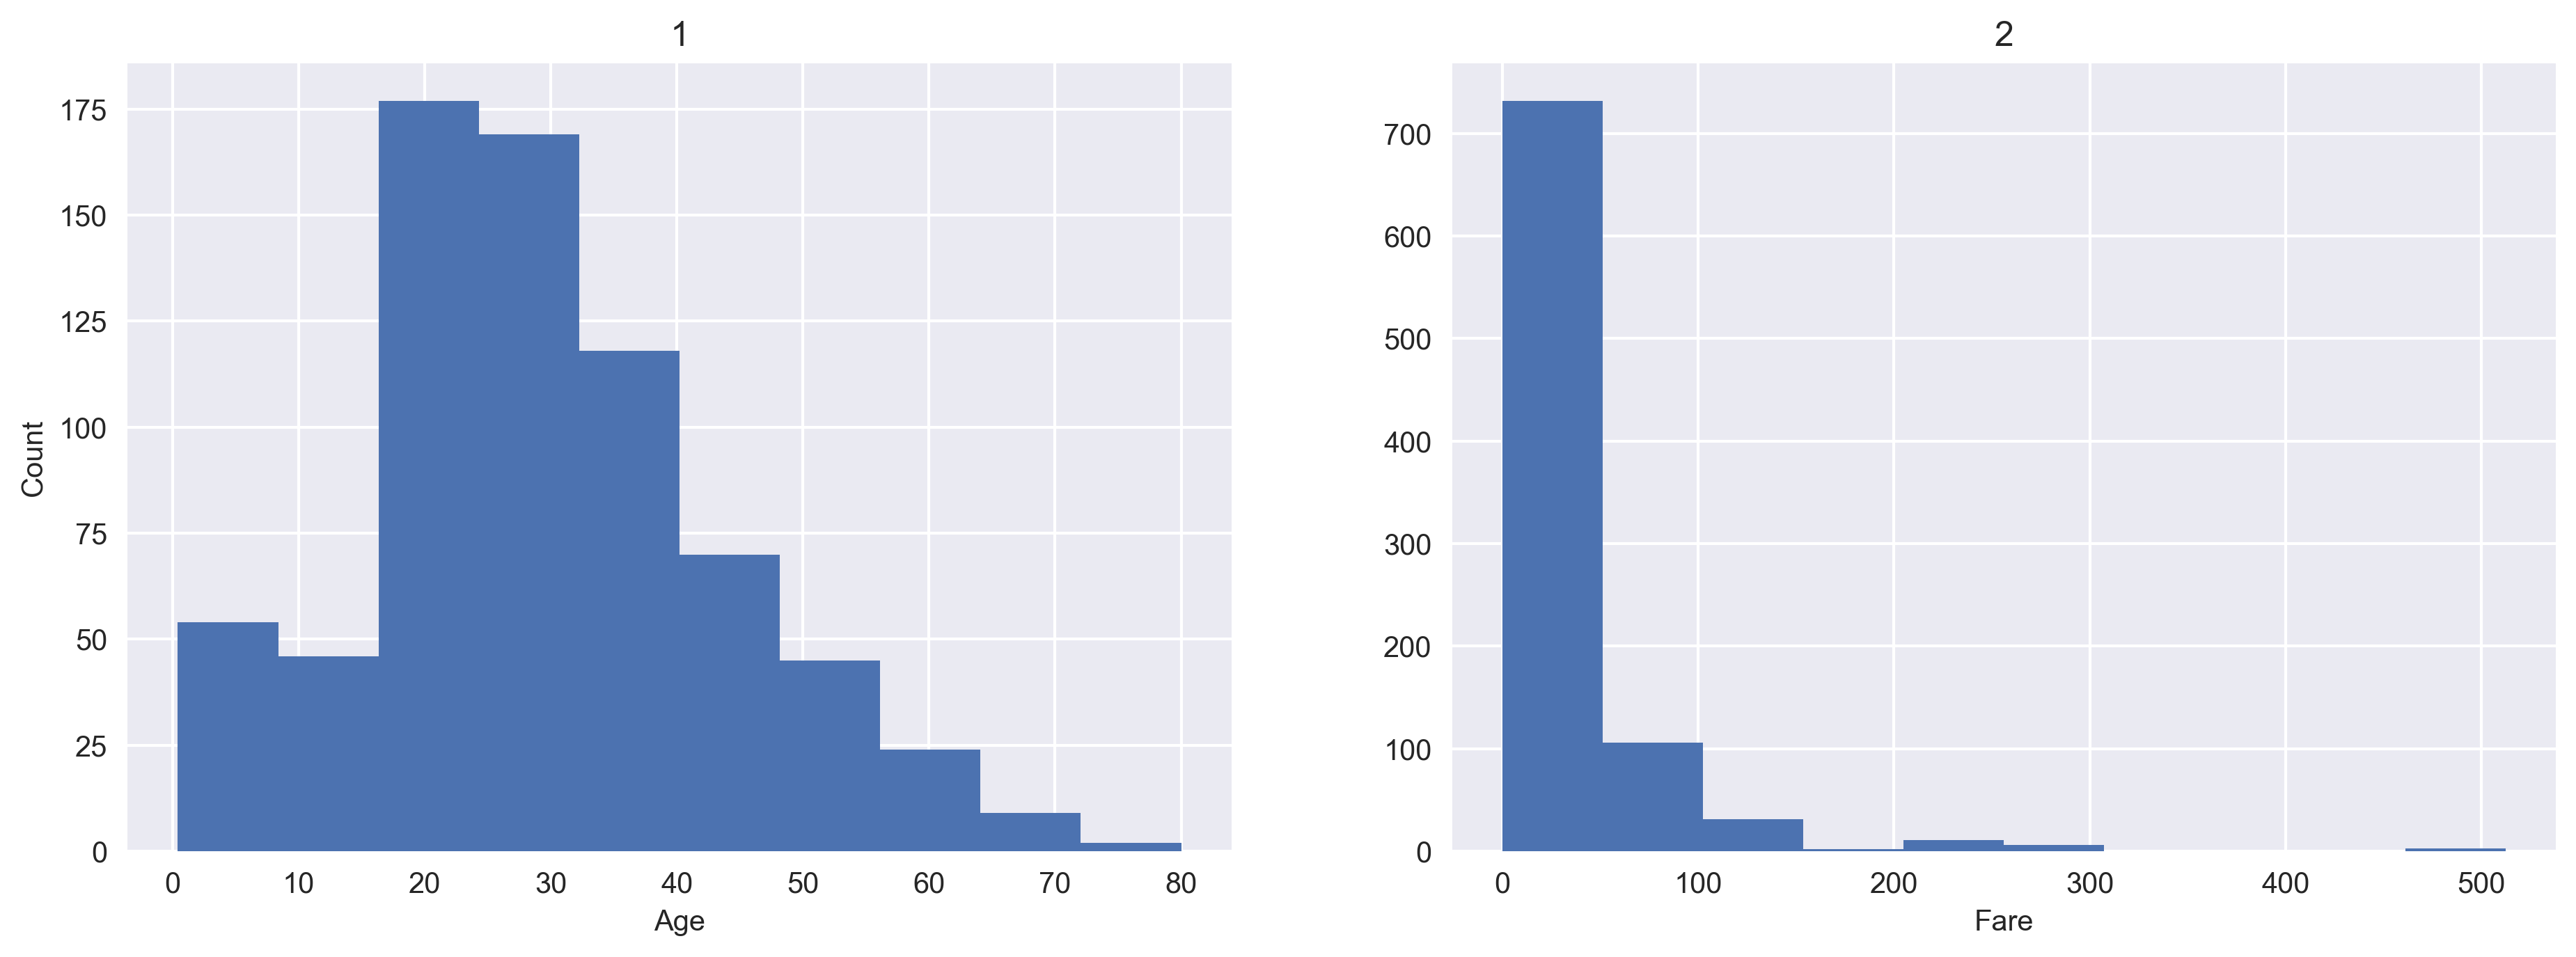

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

axs[0].set_title("1")
axs[0].hist(df["Age"])
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Age")

axs[1].set_title("2")
axs[1].hist(df["Fare"])
axs[1].set_xlabel("Fare")

plt.show()

## 2. Обрабатываем признаки

1. Найдем признаки, у которых есть пропущенные значения, и обработаем эти пропущенные значения
2. Переведём категориальные признаки в числовые

#### Обработаем признак `Sex`

**Задание.** Проверьте, есть ли пропуски в столбце `Sex`.

In [ ]:
# <YOUR CODE HERE>
df['Sex'].isna().mean()

0.0

**Задание *.** Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать?

**Задание.** Придумайте кодировку и сделайте её.

In [ ]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1,'unknown':2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


После первичной обработки можем посмотреть, как влияет пол на выживаемость.

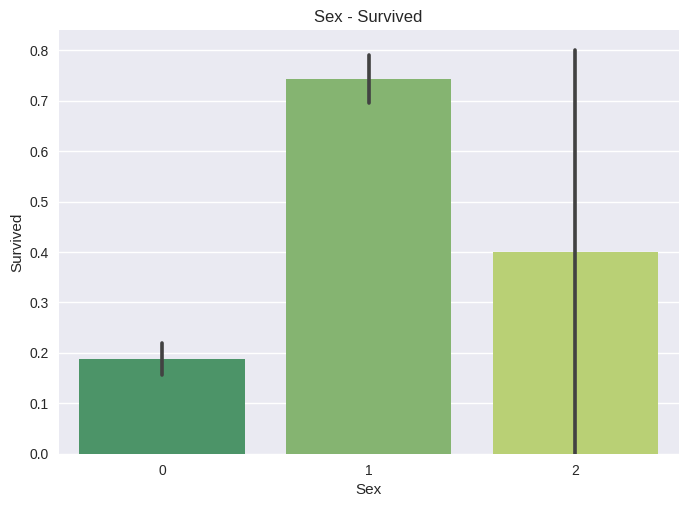

In [ ]:
sns.barplot(x="Sex", y="Survived", data=df, palette="summer")
plt.title("Sex - Survived")
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

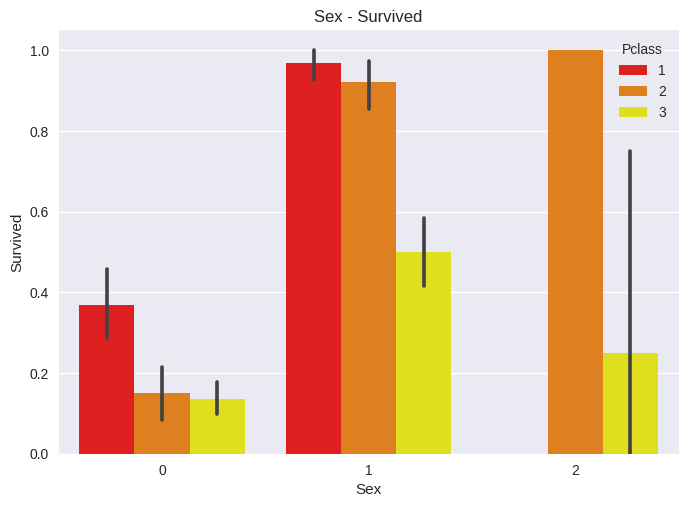

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, palette="autumn")
plt.title("Sex - Survived")
plt.show()

Ещё один полезный вид визуализации — ящик с усами. Такой вид графиков позволяет визуально оценить моду и разброс распределения признака. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

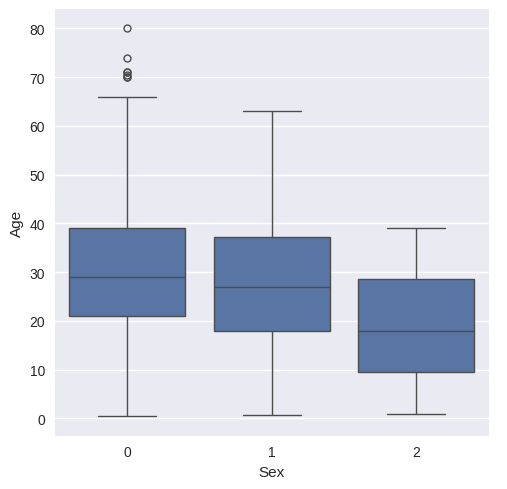

In [ ]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")  # box plot (box-and-whiskers-plot)
plt.show()

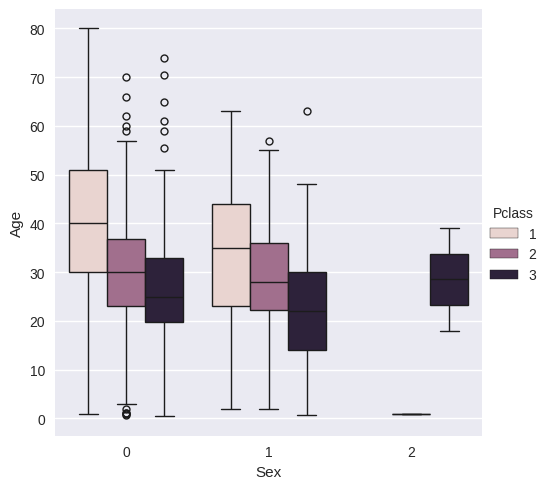

In [ ]:
sns.catplot(x="Sex", y="Age", hue="Pclass", data=df, kind="box")
plt.show()

#### Обработаем признак `Embarked` (порт посадки)

In [ ]:
print(f"Data size: {df.shape}")
df["Embarked"].value_counts(dropna=False)

Data size: (891, 12)


,count
Embarked,
S,644
C,168
Q,77
NaN,2


**Задание.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки.

In [ ]:
# <YOUR CODE HERE>
df = df.dropna(subset=['Embarked'])

**Задание.** Преобразуем столбец `Embarked` методом OneHot-кодирования при помощи `pd.get_dummies)`.

In [ ]:
# <YOUR CODE HERE>
dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S,False,True


#### Обработаем признак `Age`

Проверьте, если ли в `Age` пропущенные значения.

In [ ]:
# <YOUR CODE HERE>
df['Age'].isna().sum()

177

Заполним пропуски медианным значением `Age`.

In [ ]:
median_age = df["Age"].median()
df["Age"].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

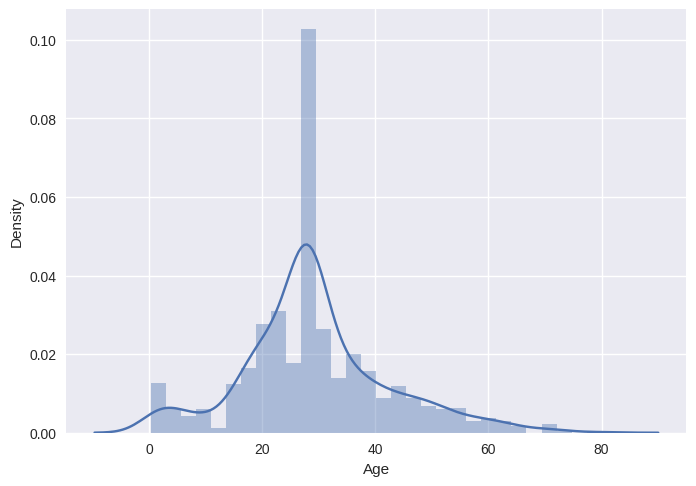

In [ ]:
sns.distplot(df["Age"], kde=True)
plt.show()

Посмотрим на распределение `Pclass` по возрастам.

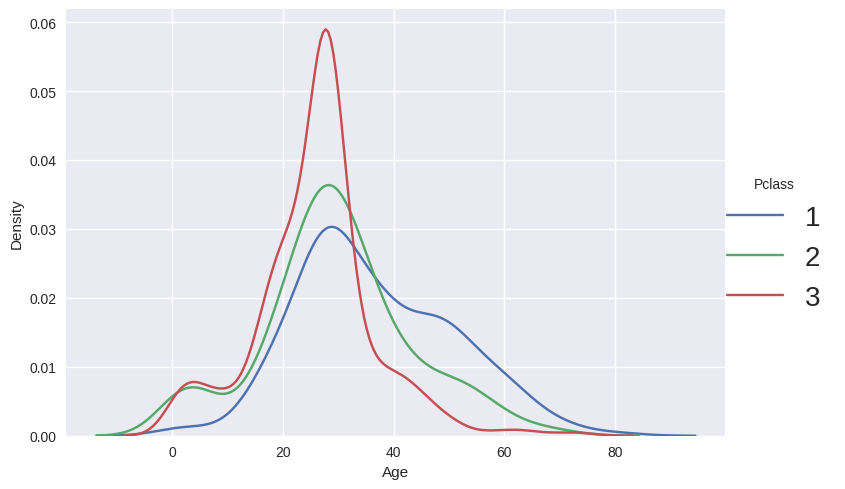

In [ ]:
facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True, height=5, aspect=1.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend(fontsize=20);

#### Обработаем признак `Fare`

**Задание.** Проверьте, если ли в `Fare` пропущенные значения. Если пропущенные значения есть, заполните их медианным значением `Fare`.

In [ ]:
# <YOUR CODE HERE>
df['Fare'].isna().mean()

0.0

#### Обработаем признак `Pclass`

**Задание.** Проверьте, если ли в `Pclass` пропущенные значения. Если пропущенные значения есть, заполните их самым частым значением `Pclass`.

In [ ]:
# <YOUR CODE HERE>
df['Pclass'].isna().mean()

0.0

**Задание.** Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.

Text(0.5, 0, 'Fare')

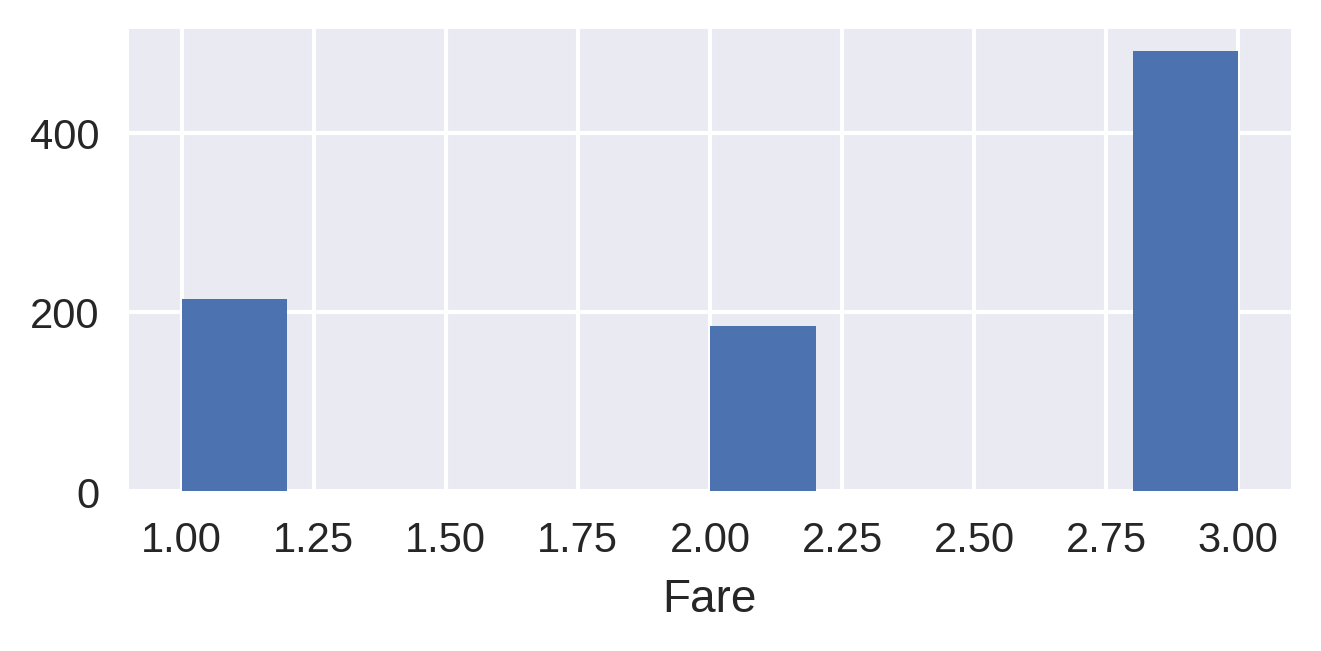

In [ ]:
# <YOUR CODE HERE>
plt.figure(figsize=(5,2), dpi=300)
plt.hist(df["Pclass"])
plt.xlabel("Fare")

#### Обработаем признак `SibSp` (число братьев или сестер, мужей, жен)

Проверим, если ли в `SibSp` пропущенные значения.

In [ ]:
df["SibSp"].value_counts()

,count
SibSp,
0,606
1,209
2,28
4,18
3,16
8,7
5,5


#### Обработаем признак `Parch` (число братьев или сестер, мужей, жен)

Проверим, если ли в `Parch` пропущенные значения.

In [ ]:
df["Parch"].isna().mean()

0.0

**Задание.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
# <YOUR CODE HERE>
df = df.drop('PassengerId', axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,True,False,True


## 3. Feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной.

**Задание.** Создайте таблицу `NumericData`, которая содержит только числовые столбцы из таблицы `Data`.

Посмотрим на попарные зависимости между некоторыми признаками.

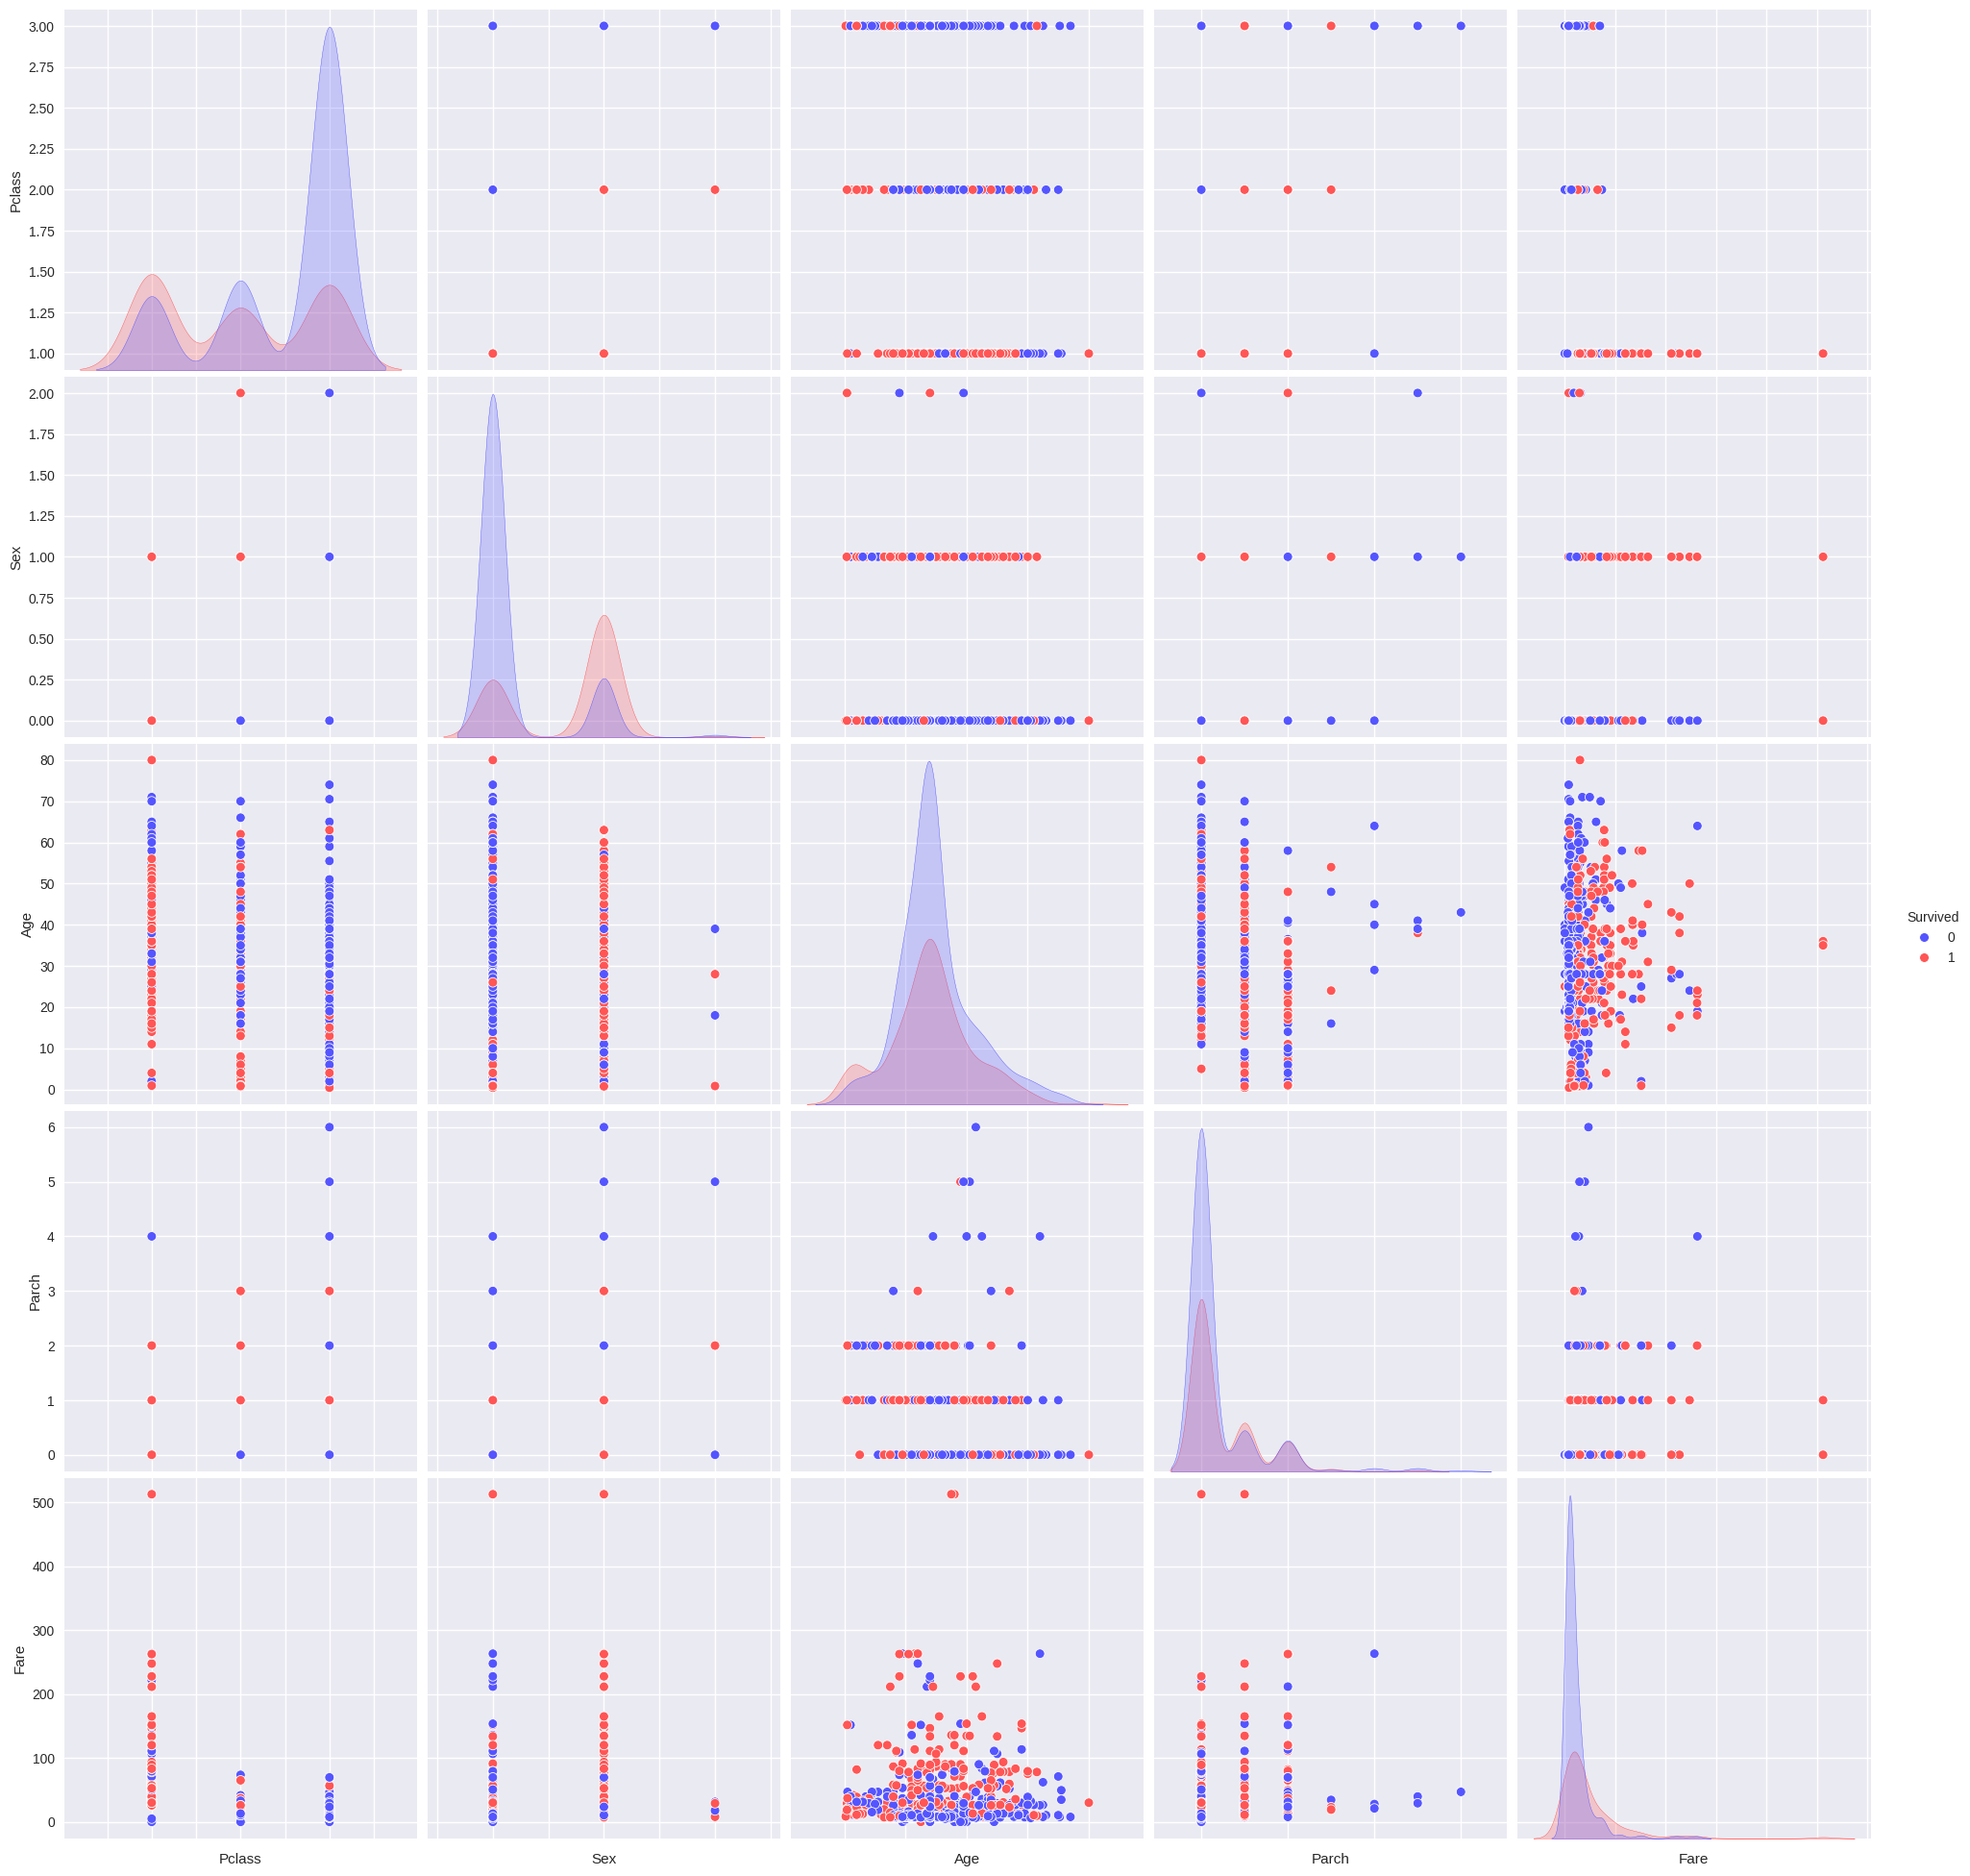

In [ ]:
g = sns.pairplot(
    df[["Survived", "Pclass", "Sex", "Age", "Parch", "Fare"]],
    hue="Survived",
    palette="seismic",
    size=4,
    diag_kind="kde",
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50),
)
g.set(xticklabels=[]);

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки `Age` и `Fare`.

* `pd.cut` — разбиение целочисленных данных на несколько интервалов по квантилям
* `pd.qcut` — разбиение числовых (необязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
df["AgeBin"] = pd.cut(df["Age"].astype(int), 5)
df["AgeBin"].head()

,AgeBin
0,"(16.0, 32.0]"
1,"(32.0, 48.0]"
2,"(16.0, 32.0]"
3,"(32.0, 48.0]"
4,"(32.0, 48.0]"


Теперь переведём полученные интервалы в числа, используя `LabelEncoder`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["AgeBin_Code"] = label.fit_transform(df["AgeBin"])
df[["Age", "AgeBin", "AgeBin_Code"]].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание.** Бинаризуйте `Fare`, используя разбиение на 4 интервала.

In [ ]:
# <YOUR CODE HERE>
df["FareBin"] = pd.qcut(df["Fare"].astype(int), 4)


In [ ]:
df['FareBin'].head()

,FareBin
0,"(-0.001, 7.0]"
1,"(31.0, 512.0]"
2,"(-0.001, 7.0]"
3,"(31.0, 512.0]"
4,"(7.0, 14.0]"


In [ ]:
label = LabelEncoder()
df["FareBin_Code"] = label.fit_transform(df["FareBin"])
df[["Fare", "FareBin", "FareBin_Code"]].head(10)

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.001, 7.0]",0
1,71.2833,"(31.0, 512.0]",3
2,7.9250,"(-0.001, 7.0]",0
3,53.1000,"(31.0, 512.0]",3
4,8.0500,"(7.0, 14.0]",1
5,8.4583,"(7.0, 14.0]",1
6,51.8625,"(31.0, 512.0]",3
7,21.0750,"(14.0, 31.0]",2
8,11.1333,"(7.0, 14.0]",1
9,30.0708,"(14.0, 31.0]",2


**Задание.**

1) Создайте признак `NameLen` и запишите в него длину имени (Name).

2) Создайте признак `FamilySize`, равный `Parch` + `SibSp` + 1. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [ ]:
# <YOUR CODE HERE>
df['NameLen'] = df['Name'].str.len()
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['IsAlone'] = df['FamilySize'] == 1

**Задание.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом `Survived`.

In [ ]:
colums = ['NameLen','FamilySize', 'IsAlone', 'Survived']

NameLen       0.332582
FamilySize    0.018277
IsAlone      -0.206207
Survived      1.000000
Name: Survived, dtype: float64


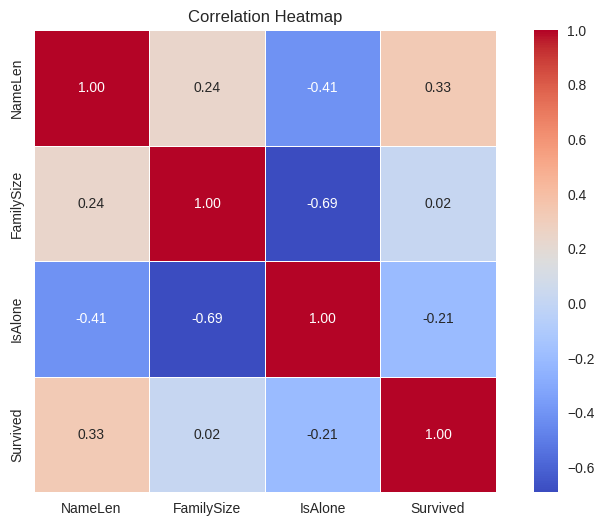

In [ ]:
# <YOUR CODE HERE>
correlation_matrix = df[colums].corr()

print(correlation_matrix['Survived'])

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

**Задание.** Придумайте новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# <YOUR CODE HERE>
df['IsChild'] = df['Age'].apply(lambda x: 1 if pd.notnull(x) and x < 18 else 0)
def categorize_age(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 18:
        return 'Child'
    elif age < 30:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
df['AgeGroup'] = df['Age'].apply(categorize_age)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['CabinType'] = df['Cabin'].str[0]

In [ ]:
correlation_matrix = df[['Survived', 'AgeGroup', 'FarePerPerson', 'CabinType', 'IsChild', 'FamilySize']].copy()

correlation_matrix = pd.get_dummies(correlation_matrix, columns=['AgeGroup', 'CabinType'], drop_first=True)

correlation_result = correlation_matrix.corr()['Survived']


Survived                1.000000
FarePerPerson           0.217902
IsChild                 0.123569
FamilySize              0.018277
AgeGroup_Child          0.123569
AgeGroup_Senior        -0.049861
AgeGroup_Young Adult   -0.112671
CabinType_B             0.166714
CabinType_C             0.115629
CabinType_D             0.151555
CabinType_E             0.146142
CabinType_F             0.058388
CabinType_G             0.016261
CabinType_T            -0.026409
Name: Survived, dtype: float64


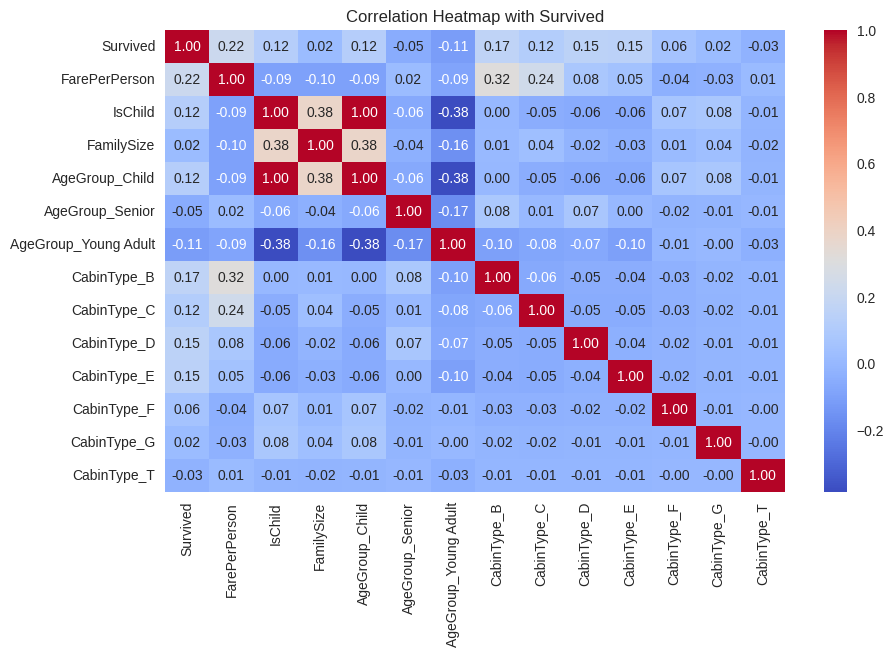

In [ ]:
print(correlation_result)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap with Survived')
plt.show()

**Задание.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то он не влияет на неё и бесполезен для нашей задачи?

## Ответ
Не обязательно. Хотя корреляция может дать представление о том, как два признака связаны, маленькая корреляция не всегда означает, что признак не влияет на целевую переменную.

Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

**Задание.**

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности

b) Оцените качество модели: вычислите долю правильных ответов алгоритма по всем данным

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve, learning_curve
import matplotlib.pyplot as plt
import warnings
from typing import Tuple
import numpy as np

In [ ]:
features = ['Pclass', 'Sex_male', 'AgeBin_Code', 'FareBin_Code', 'NameLen', 'FamilySize', 'IsAlone', 'IsChild']
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)


In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
train_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
valid_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 4)}")

Train-score: 0.993, Valid-score: 0.7175


In [ ]:
def plot_validation_curves(train_scores: np.array,
                           valid_scores: np.array,
                           figsize: Tuple[int, int] = (8, 8)
                          ):
    """
    Визуализация процесса настройки гиперпараметра
    алгоритма машинного обучения. Визуализируется значение
    метрики качества на обучащей и тестовой части данных, на
    валидационной части данных и доверительные интервалы.

    Parameters
    ----------
    train_scores: np.array
        Значения метрики качества на обучающей выборке.

    valid_scores: np.array
        Значения метрики качества на валидационной выборке.

    """
    fig = plt.figure(figsize=figsize)

    #plt.subplot(121)
    plt.title("Validation Curves", size=15)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(train_scores, axis=1),
        label="train",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
        y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
        alpha=0.25
    )
    #plt.subplot(121)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(valid_scores, axis=1),
        label="valid",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
        y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
        alpha=0.25
    )
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("roc_auc", size=15)

In [ ]:
train_scores, valid_scores = validation_curve(
    X=X_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=1),
    param_range=range(-1,10,1),
    param_name="max_depth",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

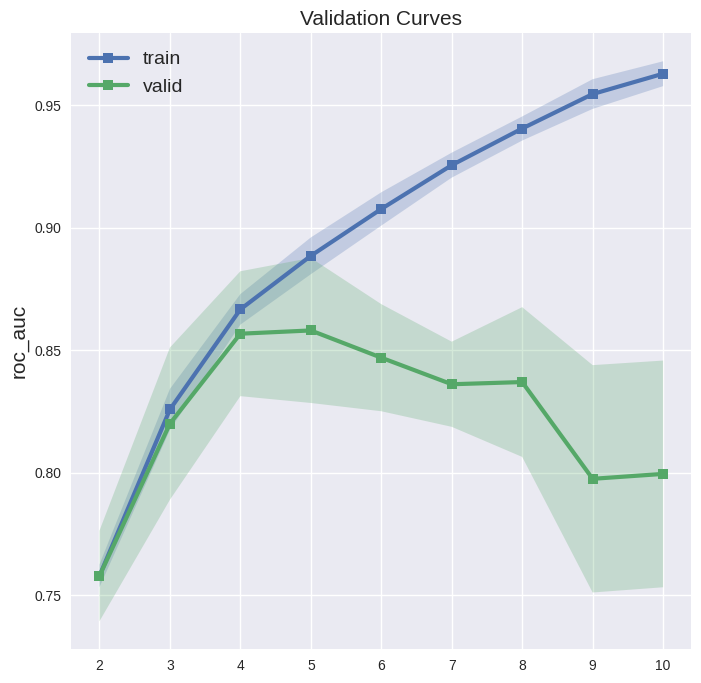

In [ ]:
plot_validation_curves(
    train_scores, valid_scores
)

In [ ]:
train_scores, valid_scores = validation_curve(
    X=X_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth = 5, random_state=1),
    param_range=range(0,10,1),
    param_name="min_samples_leaf",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

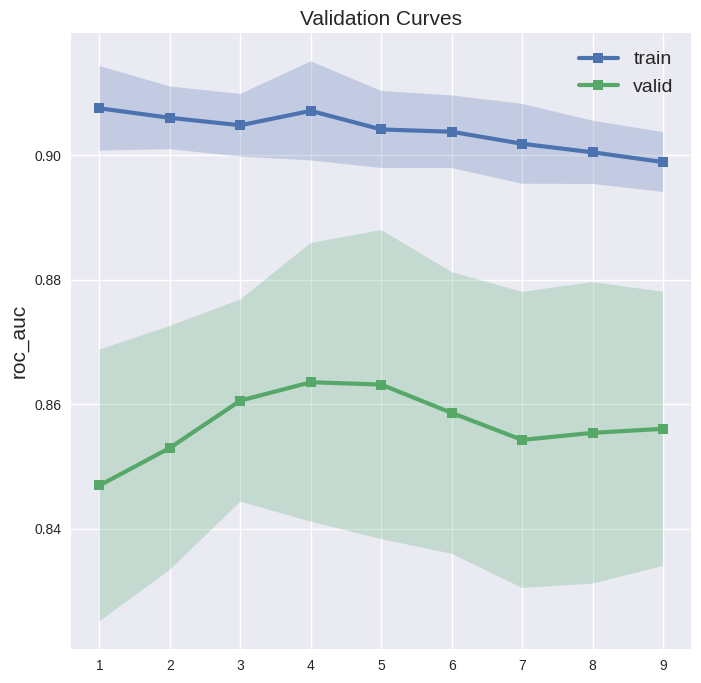

In [ ]:
plot_validation_curves(
    train_scores, valid_scores
)

In [ ]:
train_size, train_scores, valid_scores = learning_curve(
    X=X_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1),
    scoring="roc_auc",
    n_jobs=-1,
    cv=5
)

Text(0, 0.5, 'roc-auc')

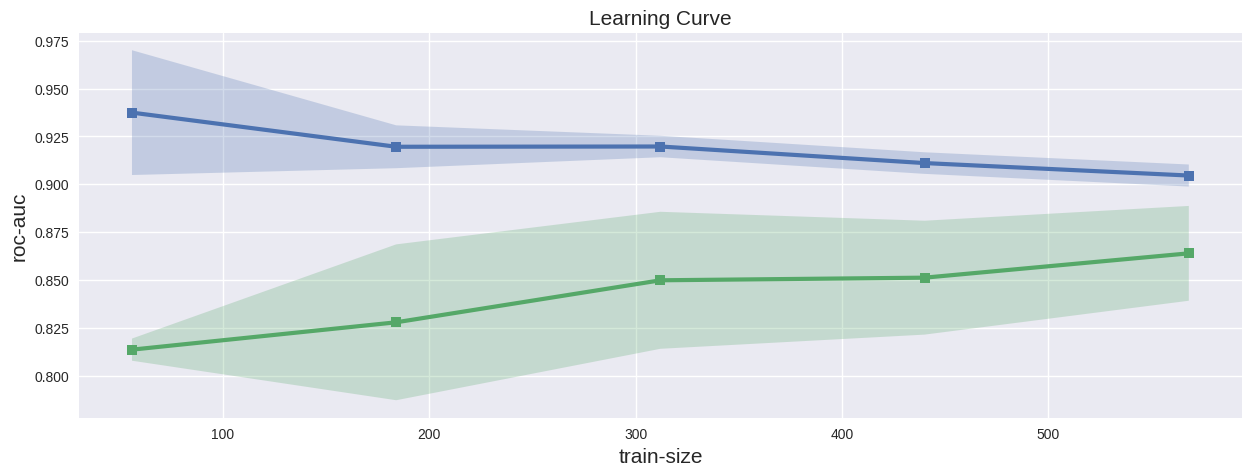

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train_size, np.mean(train_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
    y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
    alpha=0.25
)
plt.plot(train_size, np.mean(valid_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
    y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
    alpha=0.25
)
plt.title("Learning Curve", size=15)
plt.xlabel("train-size", size=15)
plt.ylabel("roc-auc", size=15)

In [ ]:
model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [ ]:
train_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
valid_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 4)}")

Train-score: 0.903, Valid-score: 0.8399


In [ ]:
def prediction(x):
    x = pd.DataFrame([x], columns=X.columns)
    return model.predict(x)

In [ ]:
example_input = {'Pclass': 2, 'Sex_male': 1, 'AgeBin_Code': 3, 'FareBin_Code': 1, 'NameLen': 2, 'FamilySize': 0, 'IsAlone': 0, 'IsChild': 1}
print(f'Предсказание выживаемости: {prediction(example_input)[0]}')

Предсказание выживаемости: 0


**Задание.**

Разобъем данные на тренировочную и тестовую часть с помощью `train_test_split`.

a) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов

b) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# <YOUR CODE HERE>
features = ['Pclass', 'Sex_male', 'AgeBin_Code', 'FareBin_Code', 'NameLen', 'FamilySize', 'IsAlone', 'IsChild']
X = df[features]
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Доля правильных ответов (KNN): {accuracy_knn:.2f}')

y_pred_custom_model = model.predict(X_test)


accuracy_custom_model = accuracy_score(y_test, y_pred_custom_model)
print(f'Доля правильных ответов (Ранее написанная модель): {accuracy_custom_model:.2f}')

Доля правильных ответов (KNN): 0.78
Доля правильных ответов (Ранее написанная модель): 0.86
